In [2]:
from utils.misc import load_vis_args_with_yaml
from visualize import setup_parser
from utils.setup_logging import get_logger
from experiment.build_loader import get_loader
from experiment.build_model import get_model
from utils.visual_utils import prune_and_plot_ranked_heads,load_image

import matplotlib.pyplot as plt
from PIL import Image
import torch
logger = get_logger("Prompt_CAM")

args = setup_parser().parse_args([])

######### Setup Configuration ###################################
model = "dino"
dataset = "cub"

yaml_config_file = f"./experiment/config/prompt_cam/{model}/{dataset}/args.yaml"
checkpoint_path = f"./checkpoints/{model}/{dataset}/model.pt"

args= load_vis_args_with_yaml(args,yaml_config_file,checkpoint_path)

args.vis_cls = 23       #### Which class to visualize
args.top_traits = 3     #### How many traits to visualize
args.class_num = 200    #### Number of classes

### Load the model

In [3]:
model, _ , _ = get_model(args)
model.load_state_dict(torch.load(args.checkpoint)['model_state_dict'])
_=model.eval()

### Load a image (To load a dataset, see the last cell)

In [11]:
##### Loading Sample Images #####
sample = load_image('./samples/Scott_Oriole.jpg').to(args.device, non_blocking=True)
target = torch.tensor([97]) # ground truth class index

## **Show top traits for one class** 
Below, we show `args.top_traits` (defined above in first cell) traits for target class .


Head # (from most important to least important):[10, 0, 5, 6, 3, 11, 2, 8, 7, 1, 4, 9]


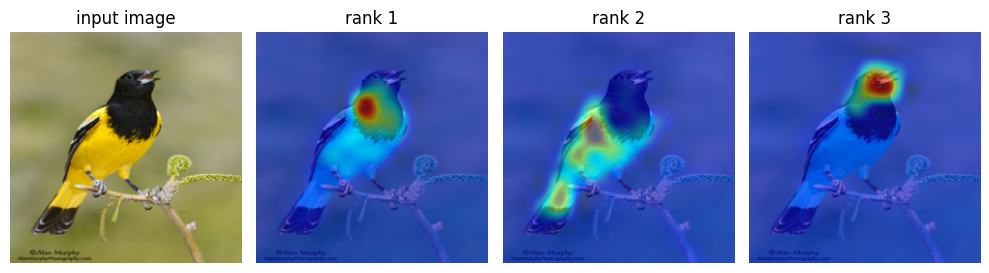

In [12]:
prune_and_plot_ranked_heads(model,sample,target[0].item(),args)

## 🔍 **What Happens When a Bird Looks at Another Bird?**
Ever wondered what traits stand out when a model looks at an image of one class but searches with another class in mind? 🤔

Let’s say we ask:
**"Hey, Baltimore Oriole 🧡, what do you see when you look at this Scott Oriole image?"**

The model will try to find its own identity 👀—that is, it will search for features in the Scott Oriole image that match what it knows about a Baltimore Oriole.

This lets us explore:
- ✨ Which traits are shared between two bird species?

- 🧠 What the model thinks is important for each class?

- 🎨 How different classes ‘see’ the same image differently!

Change the target class to any bird you like and watch how the attention shifts!

**Let’s visualize what traits a Baltimore Oriole finds familiar in a Scott Oriole: 👇**

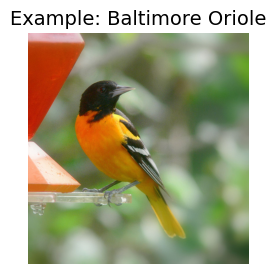

Head # (from most important to least important):[10, 5, 0, 6, 11, 3, 8, 2, 4, 7, 1, 9]


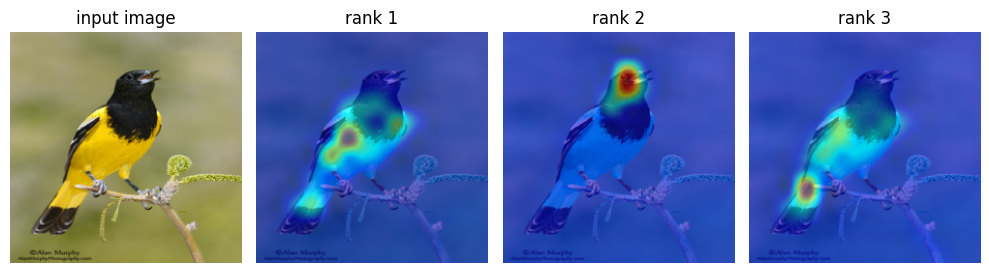

In [19]:
# 🔍 Choose your target class (Baltimore Oriole = class 94)
target_class = 94
example_image_path = './samples/Baltimore_Oriole.jpg'

# 📸 Display the example image
plt.figure(figsize=(4, 3))
plt.imshow(Image.open(example_image_path))
plt.title("Example: Baltimore Oriole", fontsize=14)
plt.axis('off')
plt.show()

# 🧠 Visualize the most important attention heads for this target class
# This shows how Baltimore Oriole class interprets the traits in a different image
prune_and_plot_ranked_heads(model, sample, target_class, args) 


### Now, Let’s ask:
**"Hey, Orchard Oriole 🧡, what do you see when you look at this Scott Oriole image?"**


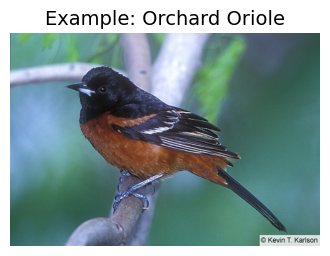

Head # (from most important to least important):[10, 5, 6, 11, 8, 3, 4, 1, 7, 0, 2, 9]


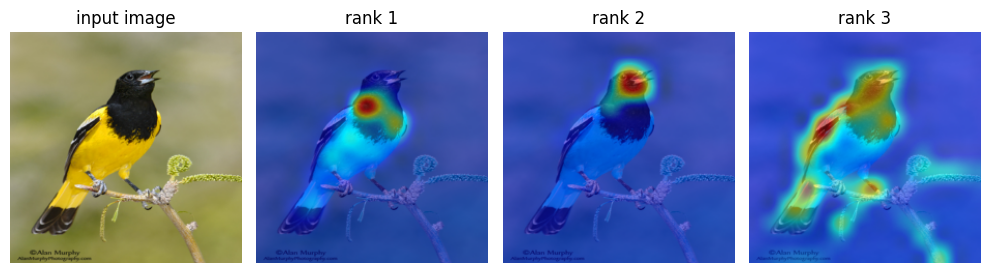

In [24]:
# 🔍 Choose your target class (Orchard Oriole = class 96)
target_class = 96
example_image_path = './samples/Orchard_Oriole.jpg'

# 📸 Display the example image
plt.figure(figsize=(4, 3))
plt.imshow(Image.open(example_image_path))
plt.title("Example: Orchard Oriole", fontsize=14)
plt.axis('off')
plt.show()

# 🧠 Visualize the most important attention heads for this target class
# This shows how Baltimore Oriole class interprets the traits in a different image
prune_and_plot_ranked_heads(model, sample, target_class, args)

## What about a blackbird? 
**"Hey, Blackbird, what do you see when you look at this Scott Oriole image?"**

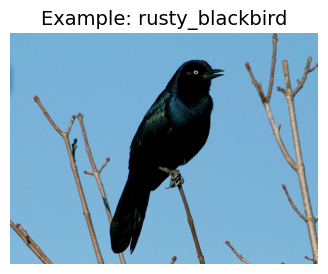

Head # (from most important to least important):[10, 5, 3, 6, 11, 8, 2, 7, 4, 1, 0, 9]


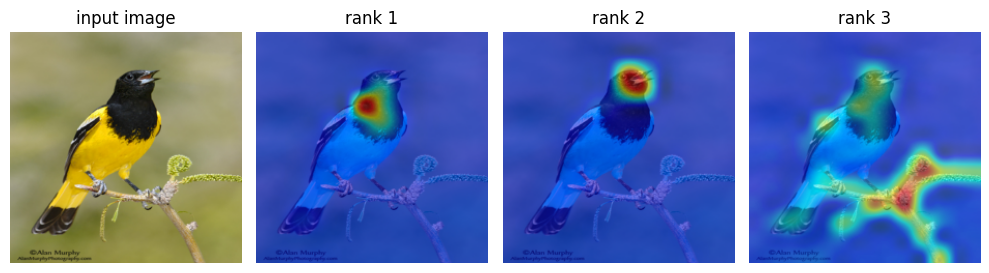

In [26]:
# 🔍 Choose your target class (rusty_blackbird = class 10)
target_class = 10
example_image_path = './samples/rusty_Blackbird.jpg'

# 📸 Display the example image
plt.figure(figsize=(4, 3))
plt.imshow(Image.open(example_image_path))
plt.title("Example: rusty_blackbird", fontsize=14)
plt.axis('off')
plt.show()

# 🧠 Visualize the most important attention heads for this target class
# This shows how Baltimore Oriole class interprets the traits in a different image
prune_and_plot_ranked_heads(model, sample, target_class, args)

### Interestingly🔍 Nothing matches except the top part of the bird!

## **Trait Manipulation**
We have uploaded a image of `Red-winged Blackbird` to the `samples` folder manipulating the `trait` of the image(the red part of the wing). We can see how the class prediction is changed from 'Red-winged Blackbird' to 'Groove-Billed Ani (manipulated)'.

Predicted class for the Original Image: 9
Predicted class for the Manipulated Image: 3
Head # (from most important to least important):[0, 10, 1, 5, 2, 11, 3, 7, 9, 4, 6, 8]


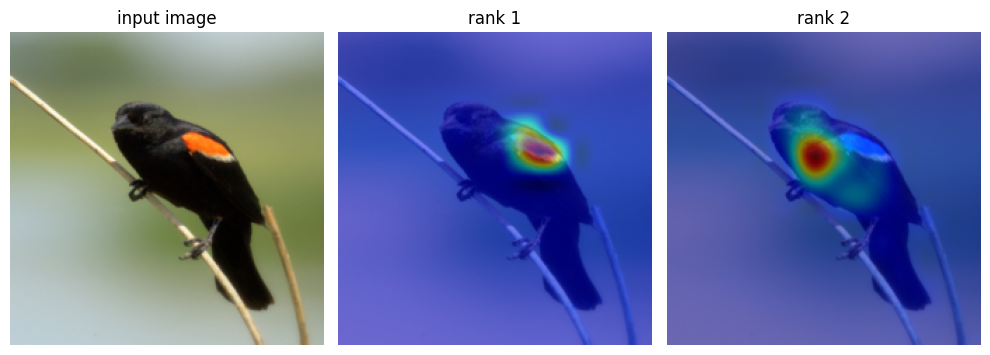

Head # (from most important to least important):[10, 1, 5, 2, 9, 11, 3, 7, 4, 6, 8, 0]


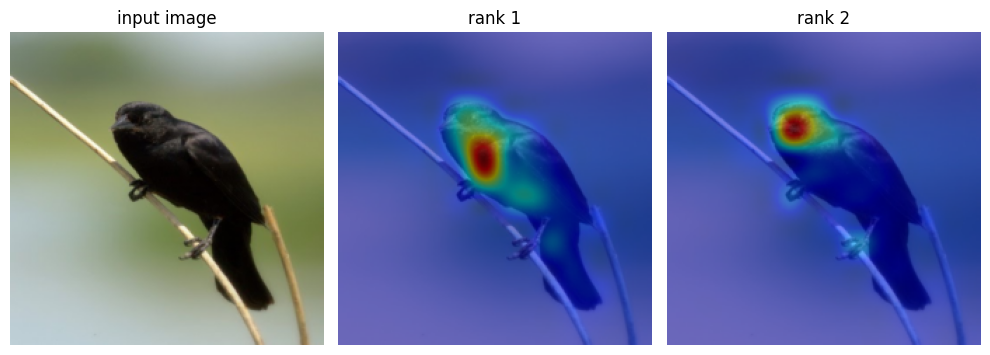

In [12]:
############### Loading Sample Images ###############
original_img = load_image('./samples/red_winged_blackbird.jpg').to(args.device, non_blocking=True)
manipulated_img = load_image('./samples/trait_manipulation.jpg').to(args.device, non_blocking=True)
target = 9 #9 for red winged blackbird
args.top_traits = 2

################    Prediction       #################
outputs, _ = model(original_img)
predicted_class = torch.argmax(outputs, dim=1).item()
print(f"Predicted class for the Original Image: {predicted_class}")

outputs, _ = model(manipulated_img)
predicted_class = torch.argmax(outputs, dim=1).item()
print(f"Predicted class for the Manipulated Image: {predicted_class}")

################    Visualization       #################
prune_and_plot_ranked_heads(model,original_img,target,args)
prune_and_plot_ranked_heads(model,manipulated_img,target,args)


### If you have downloaded the dataset, then follow the below steps to do same thing as above.

Head # (from most important to least important):[0, 10, 9, 6, 5, 11, 4, 3, 7, 8, 1, 2]


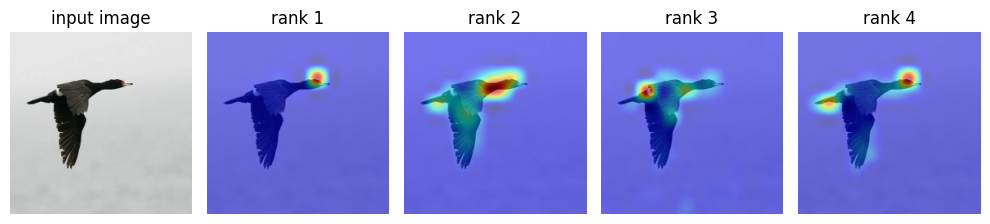

In [16]:
#### Loading Test Data #####
_, _, test_loader = get_loader(args, logger)
args.top_traits = 4

### Visualize top attention maps for correct prediction ###
with torch.no_grad():
    for batch_idx, (samples, targets) in enumerate(test_loader):
        # move data to device
        sample = samples.to(args.device, non_blocking=True)  # (1, channel, height, width)
        target = targets.to(args.device, non_blocking=True)

        if target[0].item() == args.vis_cls:
            outputs, attn_map = model(sample)
            predicted_class = torch.argmax(outputs, dim=1).item() 

            if predicted_class == target[0].item():
                prune_and_plot_ranked_heads(model,sample,target[0].item(),args)
                break
                
            